# Analise da base de dados "wiki4HE"

### A Utilização da Wikipedia como Ferramenta de Ensino
A base de dados "wiki4HE", é fruto de uma pesquisa enviada a professores de duas universidades espanholas entre 2012 e 2013: Universitat Oberta da Catalunya (UOC) e Universitat Pompeu Fabra (UPF). Ela contém 913 respostas (linhas) e 53 atributos (colunas).

A pesquisa foi organizada em duas partes. A primeira parte teve como objetivo coletar dados demográficos como: sexo, idade, área de especialização, doutorado, anos de experiência em ensino universitário, nível acadêmico e associação registrada na Wikipédia.

A segunda parte da pesquisa teve como objetivo reunir informações sobre os diferentes aspectos da Wikipedia no que diz respeito ao ensino superior e às opiniões dos professores. Essas perguntas tiveram que ser respondidas através de uma escala Likert de 5 pontos. Essa escala se refere ao nível de concordância ou discordância com uma afirmação (1 = "Discordo totalmente" e 5 = "Concordo totalmente"). 

Mais informações sobre a base de dados estão disponíveis no link: http://archive.ics.uci.edu/ml/datasets/wiki4HE.


### Linguagem de programação utilizada

A linguagem de programação utilizada nas análises será o R (https://www.r-project.org/). O R é um ambiente de software livre para modelagens e gráficos estatísticos. 

Todas as analises contidas neste documentos vão estar disponíveis no meu github. Link : https://github.com/MarinaAmorim/Analise-dos-dados-wiki4HE 

#### Pacotes necessários para as analises

In [ ]:
if (!require(dplyr)) install.packages('dplyr');library(dplyr)
library(ggplot2) # Plotting
library(knitr) # kable
#library(GGally) # ggpairs plot
library(ISLR) # Source of Data
library(MASS) # Some Classification Models (LDA, QDA)
library(class) #KNN
library(caret) # Showing Confusion Matrix Data
library(purrr) # Organizing
library(tidyr) # Organize/tidy data
#library(reshape) # Melt data for plotting
library(ape) # Trees
tableCounter = 0
figCounter = 0
#if (!require(SciencesPo)) install.packages('SciencesPo');library(SciencesPo)

#### Leitura da Base de dados


Os dados estão em um arquivo excel (.csv), com o separador de ";" e os dados ausentes ou informações faltantes estão listados como "?".

In [42]:
dados = read.csv("wiki4HE.csv", na.strings = "?", sep = ';') # leitura dos dados


In [7]:
dim(dados) # dimensão dos dados ( linhas vs Colunas)

[1] 913  53

In [8]:
head(dados) # as 6 primeiras linhas da base de dados

AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,BI2,Inc1,Inc2,Inc3,Inc4,Exp1,Exp2,Exp3,Exp4,Exp5
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
40,0,2,1,14,1,2,NA,NA,0,...,3,5,5,5,5,4,4,4,1,2
42,0,5,1,18,1,2,NA,NA,0,...,2,4,4,3,4,2,2,4,2,4
37,0,4,1,13,1,3,NA,NA,0,...,1,5,3,5,5,2,2,2,1,3
40,0,4,0,13,1,3,NA,NA,0,...,3,3,4,4,3,4,4,3,3,4
51,0,6,0,8,1,3,NA,NA,1,...,5,5,5,4,4,5,5,5,4,4
47,0,4,0,17,1,3,NA,NA,0,...,4,5,3,2,4,4,3,4,1,4


#### Definindo os tipos de cada variável


Dentre as várias informações observadas, devemos definir o tipo correto de cada variável para que ela receba o tratamento adequado na hora das analises. Uma variável pode ser numérica, categórica, lógica, etc. 

In [44]:
dados$GENDER <- as.factor( dados$GENDER )
#table(dados$DOMAIN, useNA = "always")
dados$DOMAIN = ifelse(dados$DOMAIN==6, NA,dados$DOMAIN)
dados$DOMAIN <- as.factor( dados$DOMAIN )
dados$PhD <- as.factor( dados$PhD )
dados$YEARSEXP <- as.numeric( dados$YEARSEXP )
dados$UNIVERSITY <- as.factor( dados$UNIVERSITY )
dados$UOC_POSITION <- as.factor( dados$UOC_POSITION )
dados$OTHER_POSITION <- as.factor( dados$OTHER_POSITION )
dados$OTHERSTATUS <- as.factor( dados$OTHERSTATUS )
dados$USERWIKI <- as.factor( dados$USERWIKI )
dados[,11:53] <- lapply( dados[ , 11:53 ],  factor ) # restante das variáveis ( colunas de 11 a 53)

In [173]:
# Definindo o nome das categorias
levels( dados$GENDER ) <- c( "Masculino", "Feminino" ) # sexo
levels( dados$PhD ) <- c("Não","Sim" ) # phd
levels( dados$UNIVERSITY ) <- c("UOC","UPF" ) # 1 = UOC; 2 = UPF
levels( dados$USERWIKI ) <- c("Não","Sim" )#0=No; 1=Yes
levels( dados$OTHER_POSITION ) <- c("Professor", "Associate", "NA" )#1=Professor; 2=Associate; 3=Assistant; 4=Lecturer; 5=Instructor; 6=Adjunct
levels( dados$DOMAIN ) <- c("Arts & Humanities","Sciences","Health Sciences",
                            "Engineering & Architecture", "Law & Politics")
#1=Arts & Humanities; 2=Sciences; 3=Health Sciences; 4=Engineering & Architecture; 5=Law & Politics
levels( dados$UOC_POSITION ) <- c("Professor","Associate", "Assistant", "Lecturer", "Instructor",
                                  "Adjunct", "NA")
# 1=Professor; 2=Associate; 3=Assistant; 4=Lecturer; 5=Instructor; 6=Adjunct


#### Dados ausentes



Sempre que formos analisar uma base de dados, devemos observar qual a proporção das informações faltantes, isso pode indicar algum problema na coleta ou até viesar os seus resultados. Como o nosso caso é um teste e não tem um objetivo específico, vamos apenas listar em quais variáveis tem essas informações faltantes, os chamados "NA's" e quantas são. 

In [12]:
#apply( dados, 2, anyNA ) 

In [61]:
summary(dados)

      AGE              GENDER                           DOMAIN     PhD     
 Min.   :23.00   Masculino:525   Arts & Humanities         :183   Não:489  
 1st Qu.:36.00   Feminino :388   Sciences                  : 56   Sim:424  
 Median :42.00                   Health Sciences           : 73            
 Mean   :42.25                   Engineering & Architecture:137            
 3rd Qu.:47.00                   Law & Politics            :101            
 Max.   :69.00                   NA's                      :363            
                                                                           
    YEARSEXP     UNIVERSITY    UOC_POSITION   OTHER_POSITION  OTHERSTATUS 
 Min.   : 0.00   UOC:800    Adjunct  :659   Professor:268    2      :130  
 1st Qu.: 5.00   UPF:113    Associate: 68   Associate:384    7      :107  
 Median :10.00              Assistant: 50   NA       :  0    6      : 41  
 Mean   :10.87              Lecturer : 18   NA's     :261    4      : 36  
 3rd Qu.:15.00   

Apenas as variáveis AGE, GENDER, PhD, UNIVERSITY não possuem informações faltantes. Mas, para os fins pretendidos esses NA's não vão ser um problema. 


# Análise Exploratória

A seguir vamos apresentar alguns gráficos e tabelas que vão sumarizar as informações contida em nossa base de dados. 

Warning message:
"attributes are not identical across measure variables;
they will be dropped"

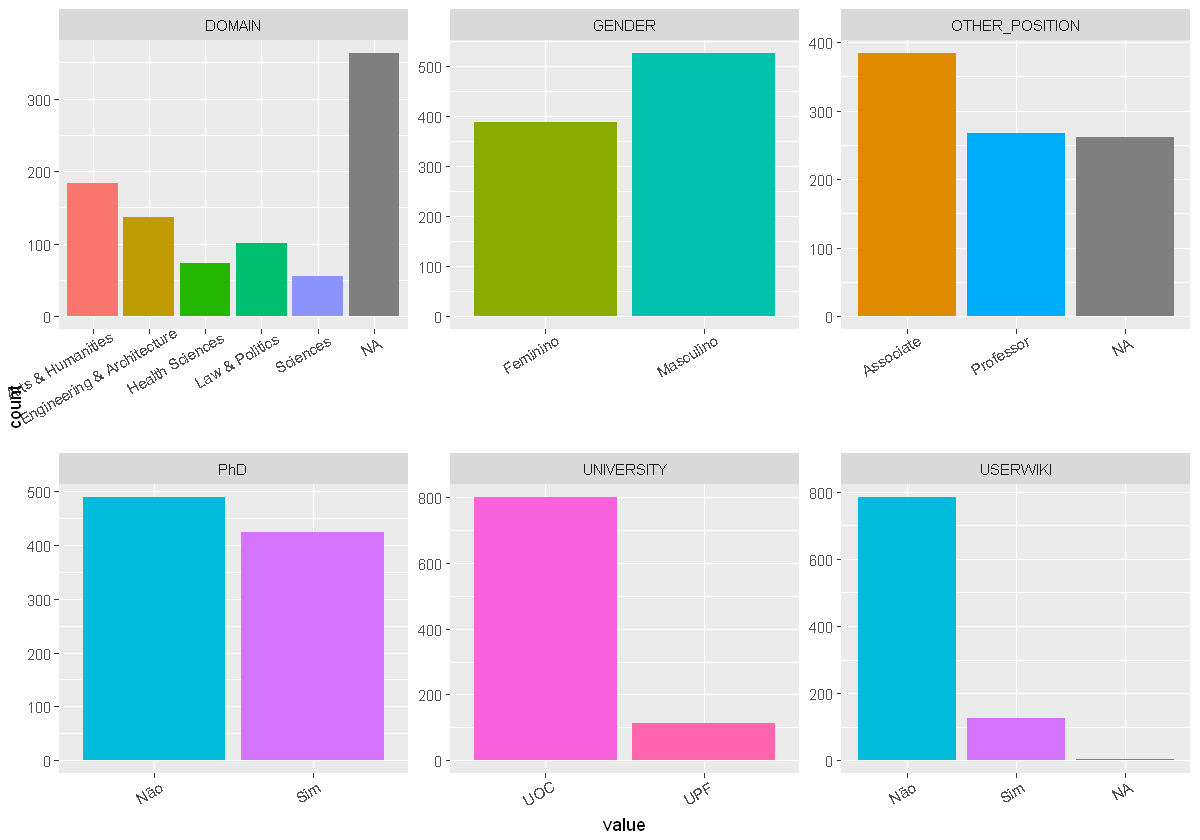

In [69]:
options(repr.plot.width=10, repr.plot.height=7)
wikifactor = dados # Create separate copy for changing survey items to ordered/factors
wikifactor[,11:ncol(dados)]=lapply(wikifactor[,11:ncol(dados)], ordered)
wikifactor[,c("GENDER","PhD","UNIVERSITY","USERWIKI", "OTHER_POSITION","DOMAIN")] %>%
  keep(is.factor) %>% 
  gather() %>% 
  ggplot(aes(value, fill=value)) +
  facet_wrap(~ key, scales = "free") +
  geom_bar() +
  theme(axis.text.x = element_text(angle = 30, hjust = 0.85),legend.position="none")

Warning message:
"Removed 23 rows containing non-finite values (stat_bin)."

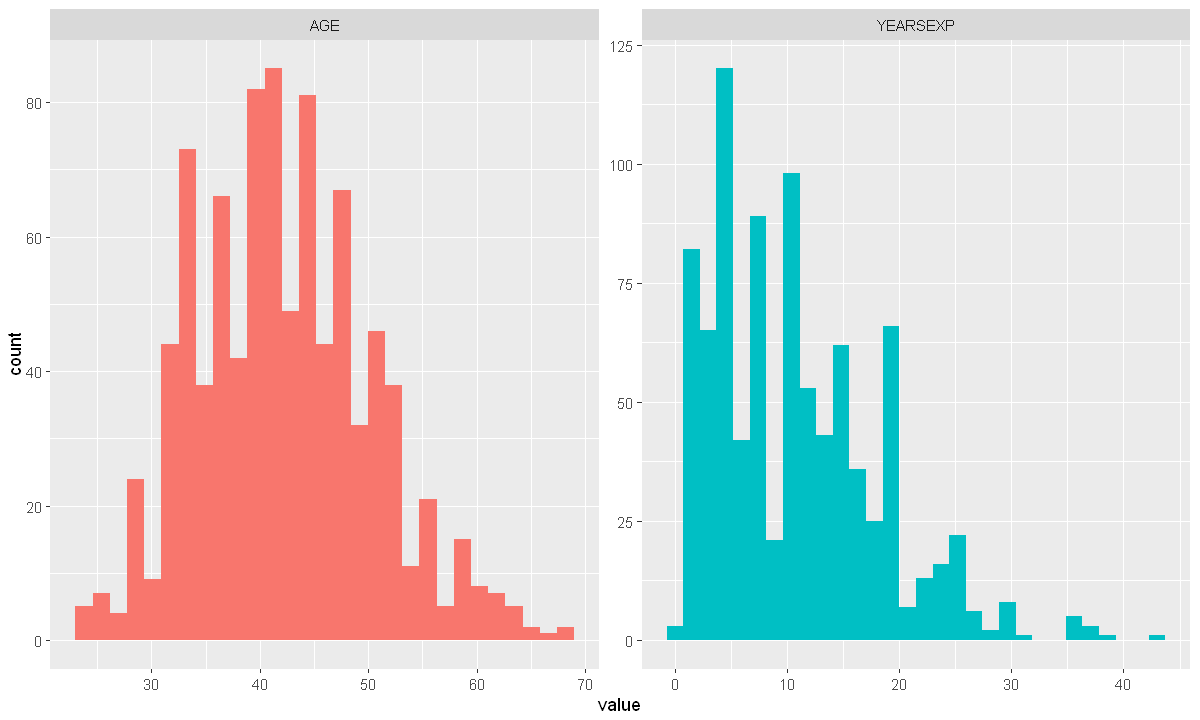

In [66]:
options(repr.plot.width=10, repr.plot.height=6)
wikifactor %>%
  keep(is.numeric) %>% 
  gather() %>% 
  ggplot(aes(value,fill=key)) +
  facet_wrap(~ key, scales = "free") +
  geom_histogram(bins=sqrt(nrow(dados))) +
  theme(legend.position="none")

#### Tabelas

In [60]:
dados %>% dplyr::select(c( GENDER,PhD,UNIVERSITY,USERWIKI, OTHER_POSITION,DOMAIN, AGE, YEARSEXP)) %>% summary()

       GENDER     PhD      UNIVERSITY USERWIKI     OTHER_POSITION
 Masculino:525   Não:489   UOC:800    Não :784   Professor:268   
 Feminino :388   Sim:424   UPF:113    Sim :125   Associate:384   
                                      NA's:  4   NA       :  0   
                                                 NA's     :261   
                                                                 
                                                                 
                                                                 
                        DOMAIN         AGE           YEARSEXP    
 Arts & Humanities         :183   Min.   :23.00   Min.   : 0.00  
 Sciences                  : 56   1st Qu.:36.00   1st Qu.: 5.00  
 Health Sciences           : 73   Median :42.00   Median :10.00  
 Engineering & Architecture:137   Mean   :42.25   Mean   :10.87  
 Law & Politics            :101   3rd Qu.:47.00   3rd Qu.:15.00  
 NA's                      :363   Max.   :69.00   Max.   :43.00  
          

#### Variáveis que estão na escala Likert de 5 pontos

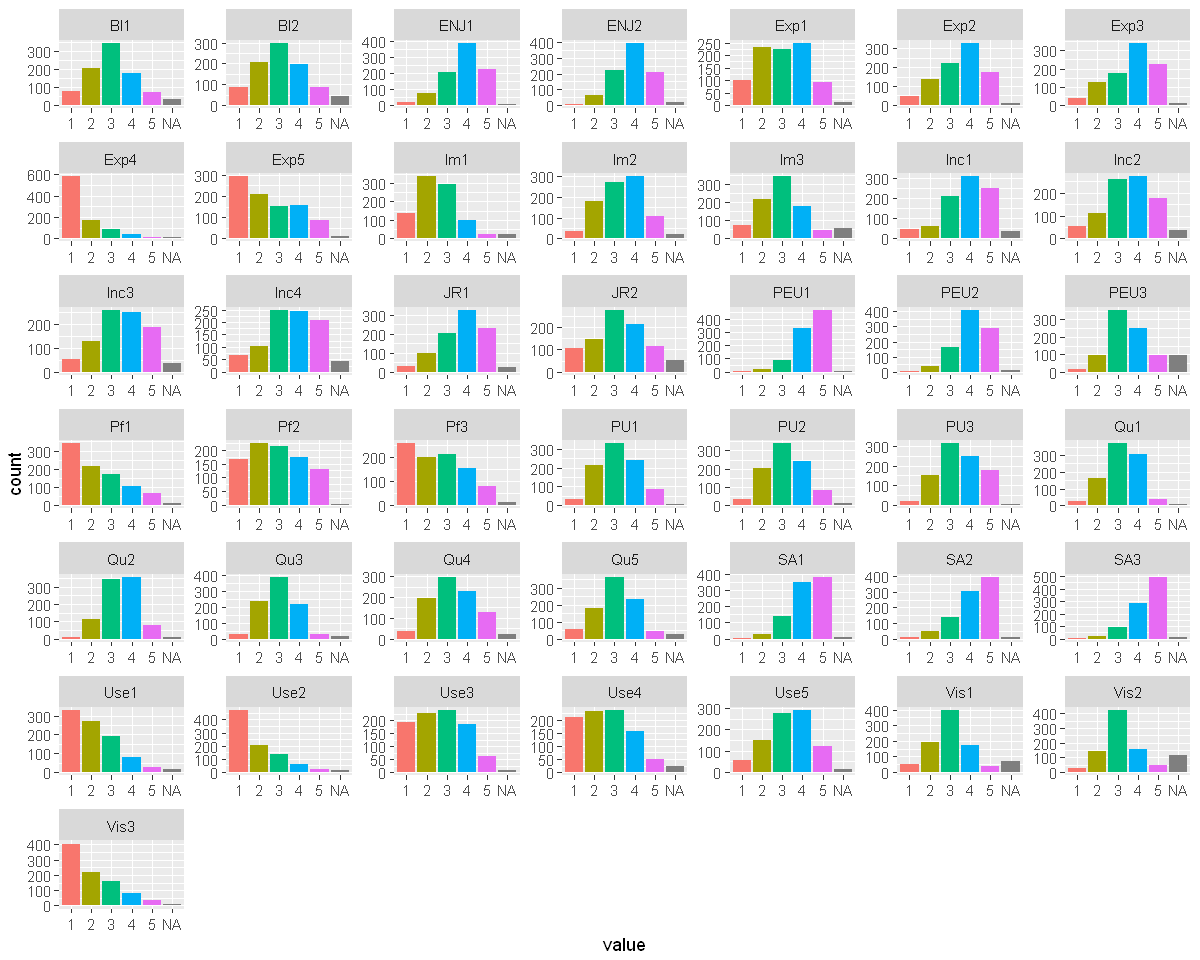

In [70]:

options(repr.plot.width=10, repr.plot.height=8)
wikifactor[11:ncol(wikifactor)] %>%
  keep(is.factor) %>% 
  gather() %>% 
  ggplot(aes(value,fill=value)) +
  facet_wrap(~ key, scales = "free") +
  geom_bar()+
  theme(legend.position="none")


## Análise das respostas entre os diferentes grupos de usuários

Nesta parte do trabalho, vamos analisar as respostas de diferentes grupos de usuários para os itens da categoria "Perceived Enjoyment": ENJ1 e ENJ2.

    * ENJ1: O uso da Wikipedia estimula a curiosidade
    * ENJ2: O uso da Wikipedia é divertido

In [113]:
# definindo as categórias
levels( dados$ENJ1 ) = c( "Discordo Totalmente", "Discordo Parcialmente",
                          "Não concordo, nem discordo",
                          "Concordo Parcialmente", "Concordo Totalmente")


levels( dados$ENJ2 ) = c( "Discordo Totalmente", "Discordo Parcialmente",
                          "Não concordo, nem discordo",
                          "Concordo Parcialmente", "Concordo Totalmente")

### O uso da Wikipédia estimula a criatividade?

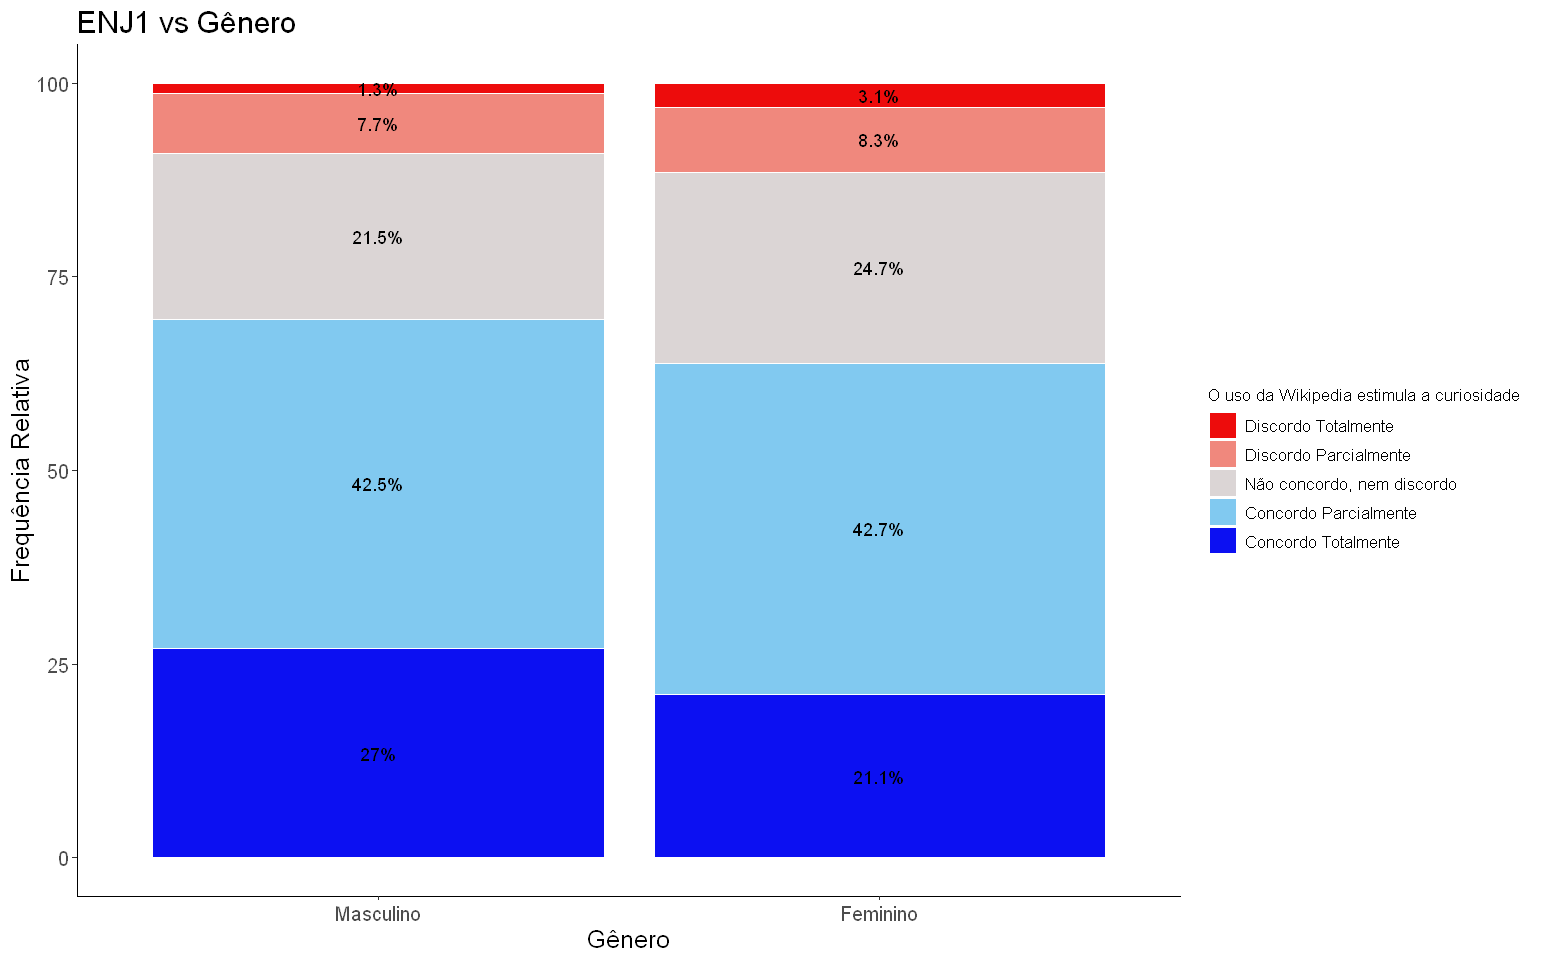

In [171]:
mycols = c("#ed0c0c","#f0887d", "#dbd5d5", "#81c9f0","#0c10f2" )
### ENJ1 vs gender ==========

ENJ1_gender <- dados %>% 
  drop_na(ENJ1) %>% # drop 7 observations
  group_by(GENDER, ENJ1) %>%
  summarise(n = n()) %>%
  mutate( freq = (n / sum(n))*100  )  # table of frequency and relative frequency to ENJ1

options(repr.plot.width=13, repr.plot.height=8)
ggplot( ENJ1_gender, aes(x = GENDER, y = freq, fill = ENJ1, label = paste0(round(freq, 1),"%") )) +
  geom_bar(stat = "identity", color = "white" ) +
    geom_text(position = position_stack(vjust = 0.5))+
ggtitle("ENJ1 vs Gênero")+
  labs(fill = "O uso da Wikipedia estimula a curiosidade", y = "Frequência Relativa", x = "Gênero" ) + 
  scale_fill_manual(values = mycols) +
  theme_classic() +
  theme(legend.title = element_text(size = 10),
        legend.text = element_text(size = 10),
        text = element_text(size=15))

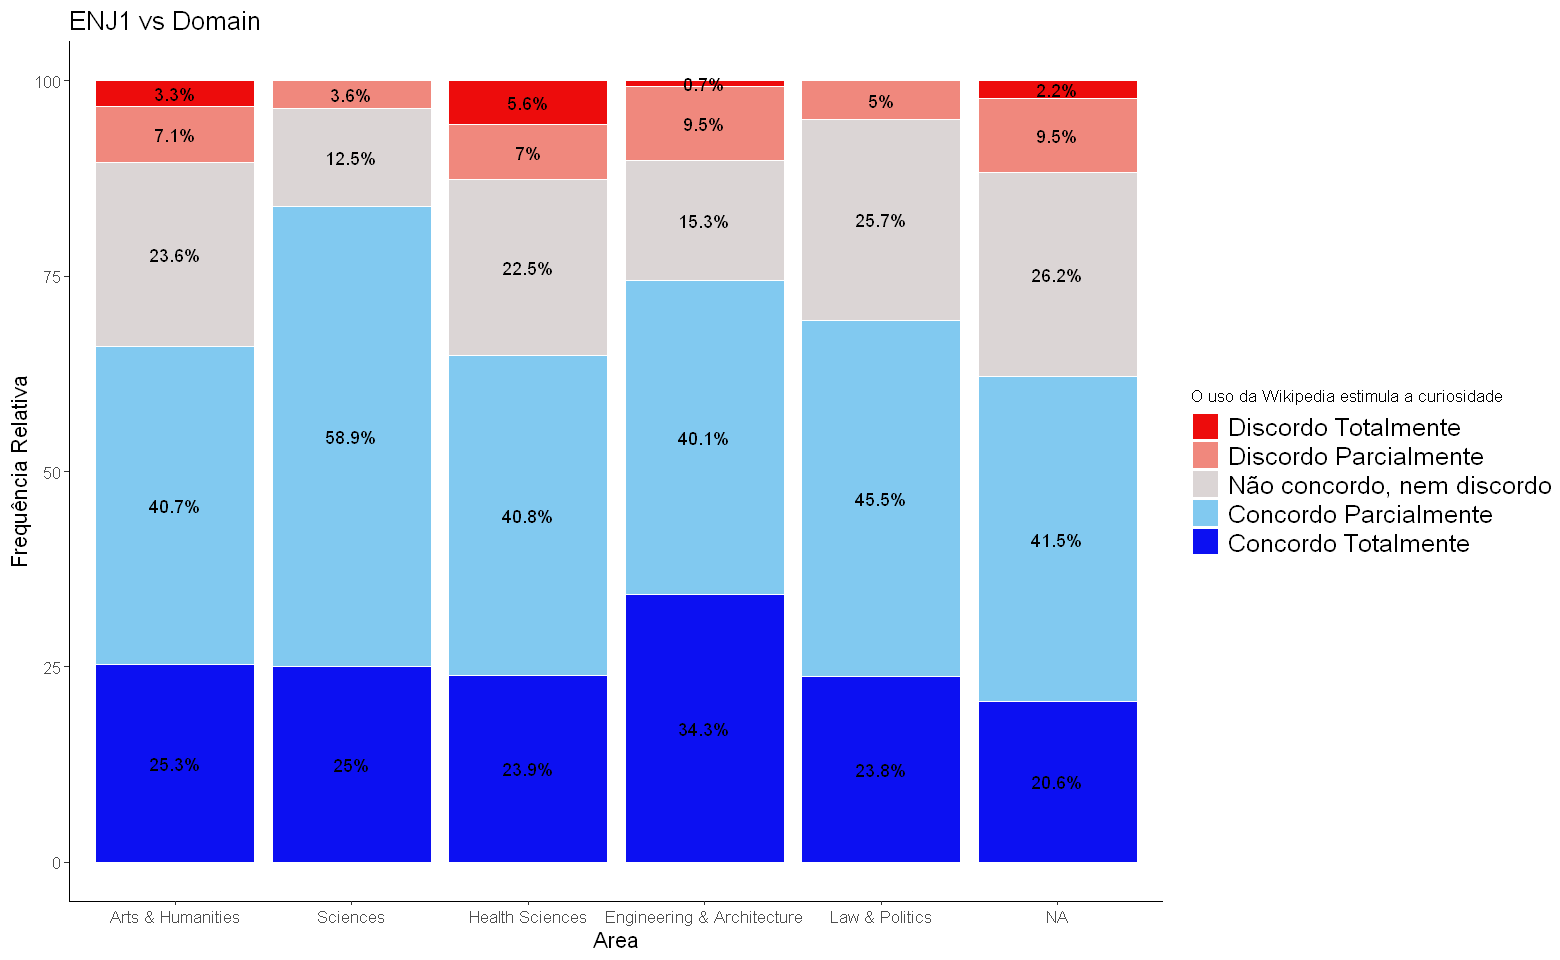

In [170]:
### ENJ1 vs Area ==========

ENJ1_domain <- dados %>% 
  drop_na(ENJ1) %>% # drop 7 observations
  group_by(DOMAIN, ENJ1) %>%
  summarise(n = n()) %>%
  mutate( freq = (n / sum(n))*100  )  # table of frequency and relative frequency to ENJ1

options(repr.plot.width=13, repr.plot.height=8)
ggplot( ENJ1_domain, aes(x = DOMAIN, y = freq, fill = ENJ1, label = paste0(round(freq, 1),"%") ) ) +
  geom_bar(stat = "identity", color = "white" ) +
ggtitle("ENJ1 vs Domain")+
    geom_text(position = position_stack(vjust = 0.5))+
  labs(fill = "O uso da Wikipedia estimula a curiosidade", y = "Frequência Relativa", x = "Area" ) + 
  scale_fill_manual(values = mycols) +
  theme_classic() +
  theme(legend.title = element_text(size = 10),
        legend.text = element_text(size = 15),
        text = element_text(size=13))

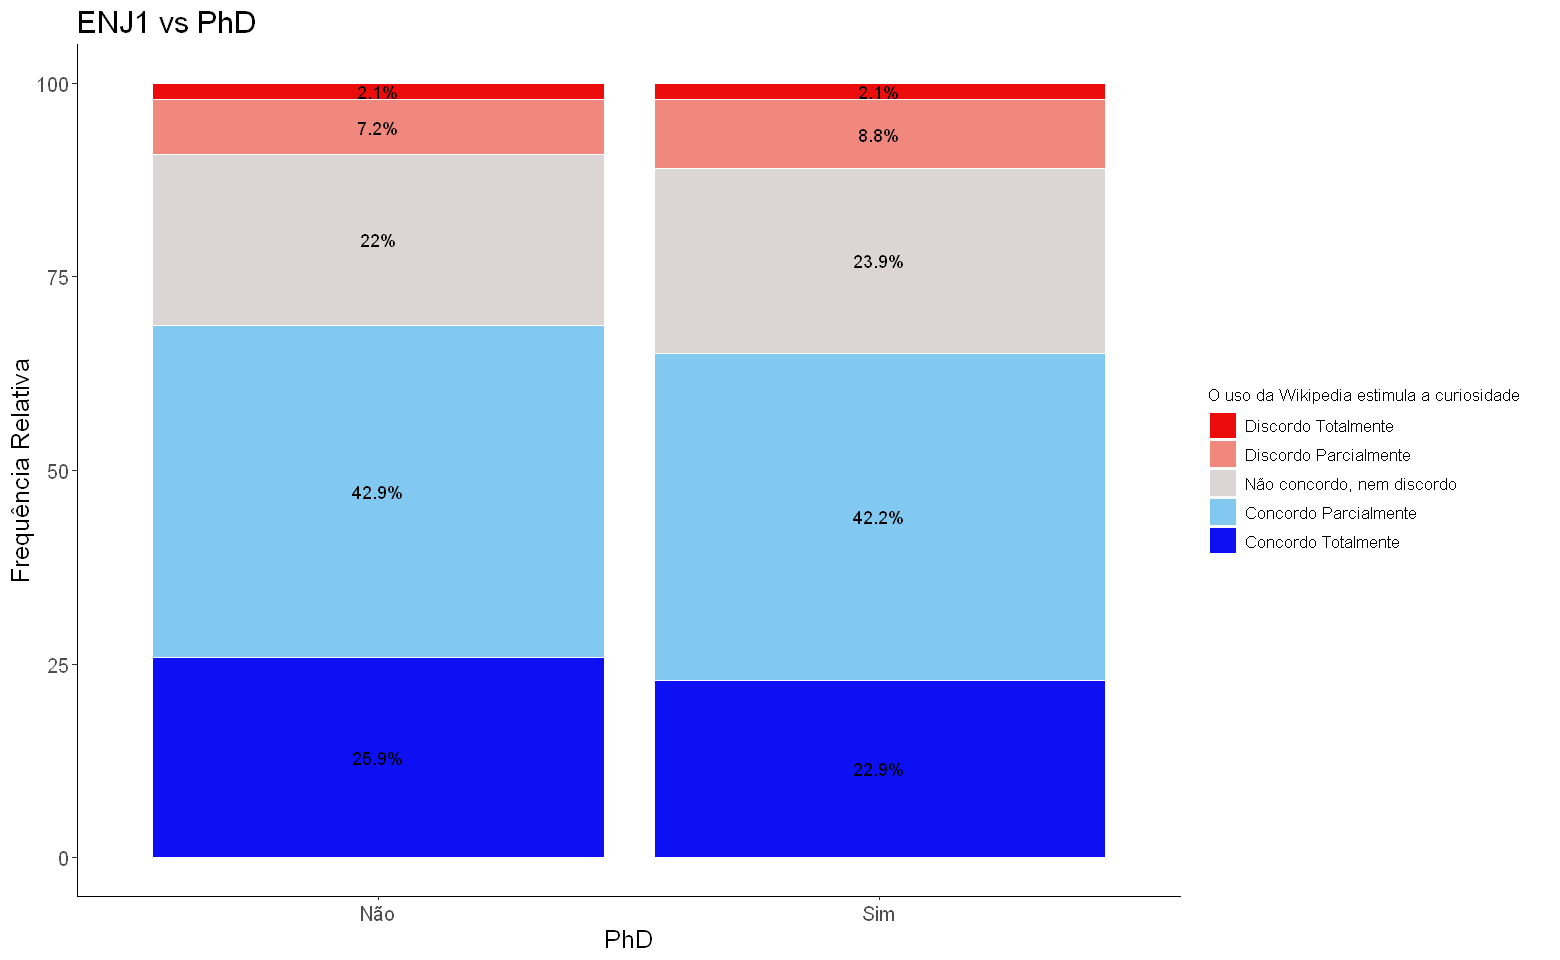

In [169]:
### ENJ1 vs Phd ==========

ENJ1_phd <- dados %>% 
  drop_na(ENJ1) %>% # drop 7 observations
  group_by(PhD, ENJ1) %>%
  summarise(n = n()) %>%
  mutate( freq = (n / sum(n))*100  )  # table of frequency and relative frequency to ENJ1

options(repr.plot.width=13, repr.plot.height=8)
ggplot( ENJ1_phd, aes(x = PhD, y = freq, fill = ENJ1, label = paste0(round(freq, 1),"%") ) ) +
  geom_bar(stat = "identity", color = "white" ) +
ggtitle("ENJ1 vs PhD")+
    geom_text(position = position_stack(vjust = 0.5))+
  labs(fill = "O uso da Wikipedia estimula a curiosidade", y = "Frequência Relativa", x = "PhD" ) + 
  scale_fill_manual(values = mycols) +
  theme_classic() +
  theme(legend.title = element_text(size = 10),
        legend.text = element_text(size = 10),
        text = element_text(size=15))

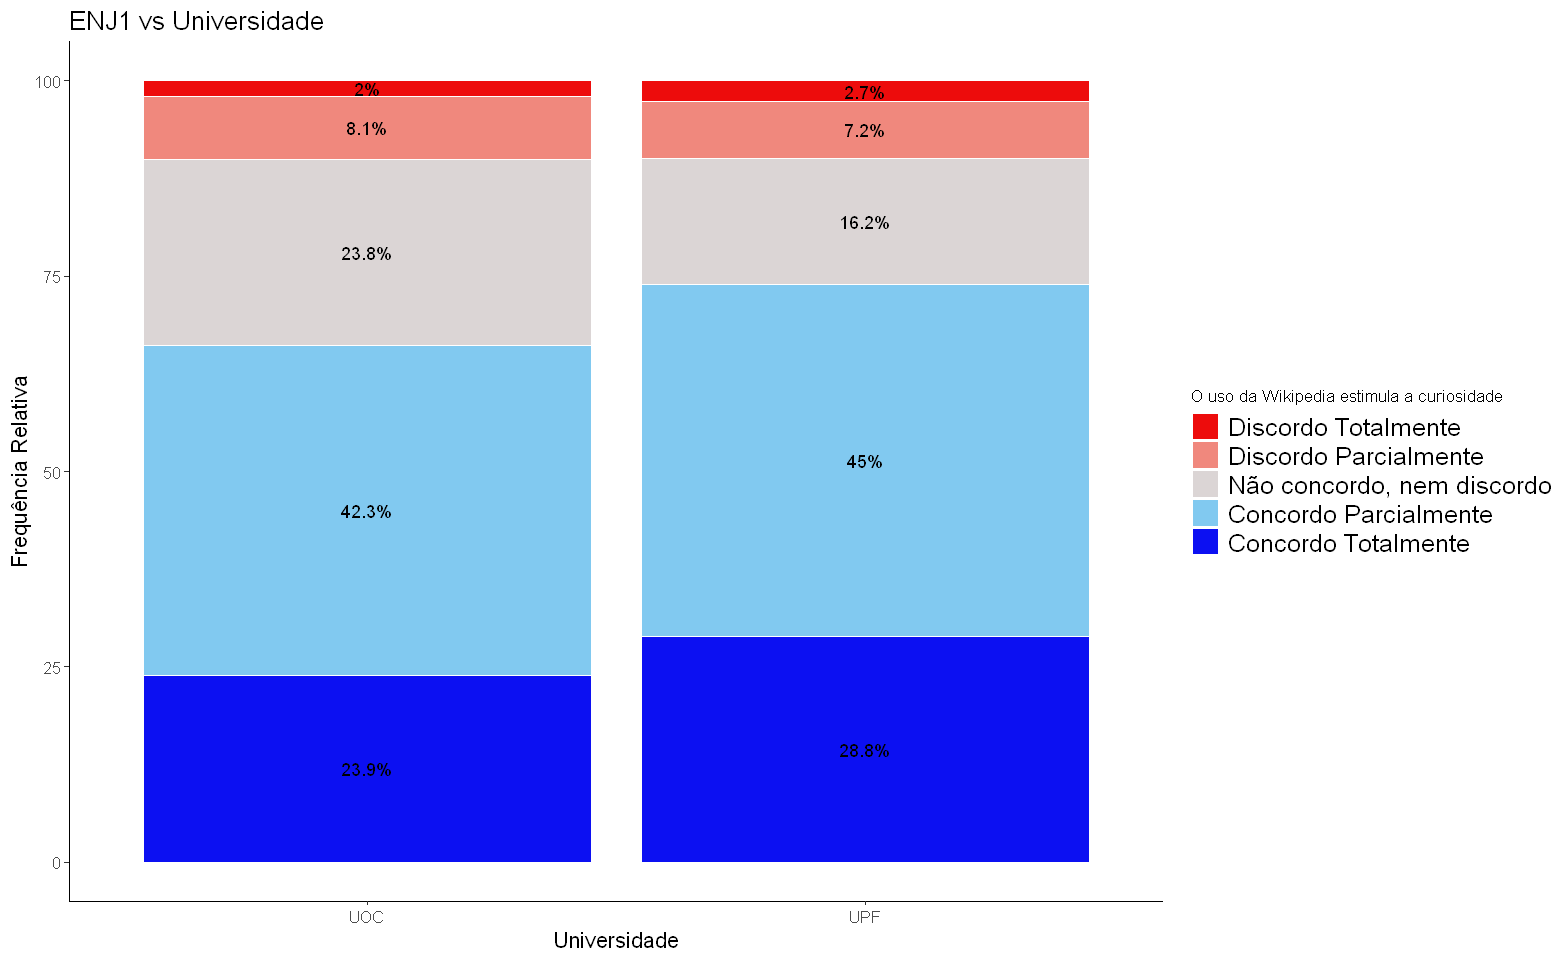

In [168]:
### ENJ1 vs Universidade ==========

ENJ1_uni <- dados %>% 
  drop_na(ENJ1) %>% # drop 7 observations
  group_by(UNIVERSITY, ENJ1) %>%
  summarise(n = n()) %>%
  mutate( freq = (n / sum(n))*100  )  # table of frequency and relative frequency to ENJ1

options(repr.plot.width=13, repr.plot.height=8)
ggplot( ENJ1_uni, aes(x = UNIVERSITY, y = freq, fill = ENJ1, label = paste0(round(freq, 1),"%") ) ) +
  geom_bar(stat = "identity", color = "white" ) +
ggtitle("ENJ1 vs Universidade")+
geom_text(position = position_stack(vjust = 0.5))+
  labs(fill = "O uso da Wikipedia estimula a curiosidade", y = "Frequência Relativa", x = "Universidade" ) + 
  scale_fill_manual(values = mycols) +
  theme_classic() +
  theme(legend.title = element_text(size = 10),
        legend.text = element_text(size = 15),
        text = element_text(size=13))

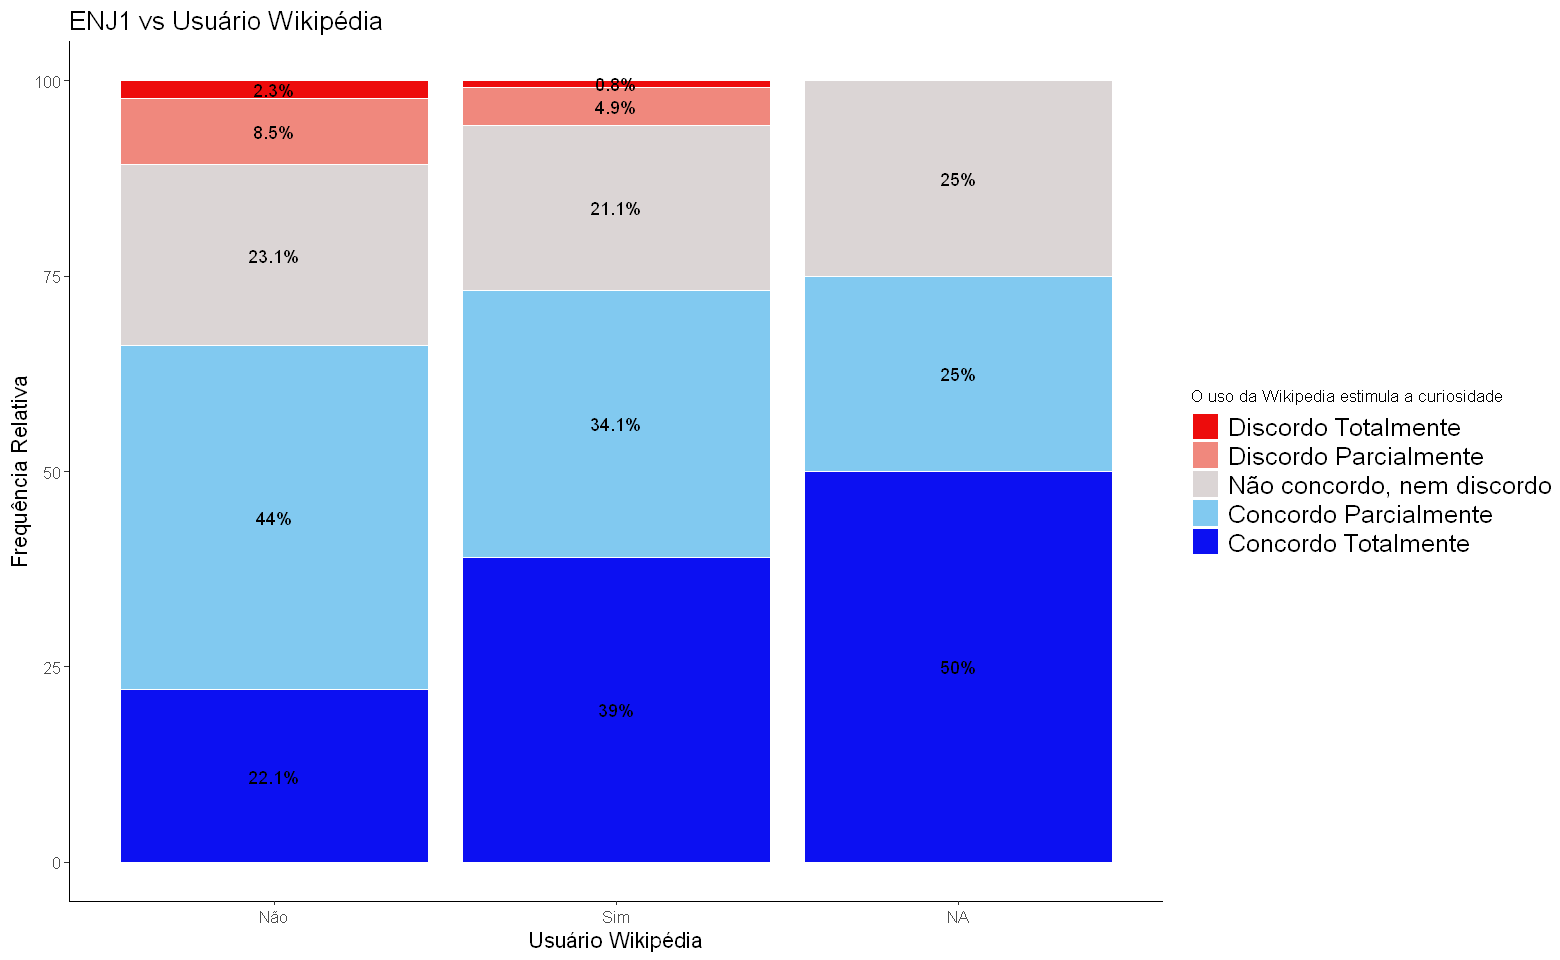

In [167]:
### ENJ1 vs Usuário Wikipédia ==========

ENJ1_user <- dados %>% 
  drop_na(ENJ1) %>% # drop 7 observations
  group_by(USERWIKI, ENJ1) %>%
  summarise(n = n()) %>%
  mutate( freq = (n / sum(n))*100  )  # table of frequency and relative frequency to ENJ1

options(repr.plot.width=13, repr.plot.height=8)
ggplot( ENJ1_user, aes(x = USERWIKI, y = freq, fill = ENJ1, label = paste0(round(freq, 1),"%") )) +
  geom_bar(stat = "identity", color = "white" ) +
ggtitle("ENJ1 vs Usuário Wikipédia")+
    geom_text(position = position_stack(vjust = 0.5))+
  labs(fill = "O uso da Wikipedia estimula a curiosidade", y = "Frequência Relativa", x = "Usuário Wikipédia" ) + 
  scale_fill_manual(values = mycols) +
  theme_classic() +
  theme(legend.title = element_text(size = 10),
        legend.text = element_text(size = 15),
        text = element_text(size=13))

Quando analisamos a variável ENJ1 (O uso da Wikipedia estimula a curiosidade) comparada com sexo, area, PhD, universidade e se utiliza a wikipédia, os percentuais são muito parecidos entre as categórias. Apenas a variável que leva em consideração o fato do professor utilizar ou não a wikipédia que mostra uma leve diferença nas categórias, mostrando que indivíduos que usam a ferramenta tende a concordar com o fato que ela estimula a criatividade.

### O uso da Wikipédia é interessante?

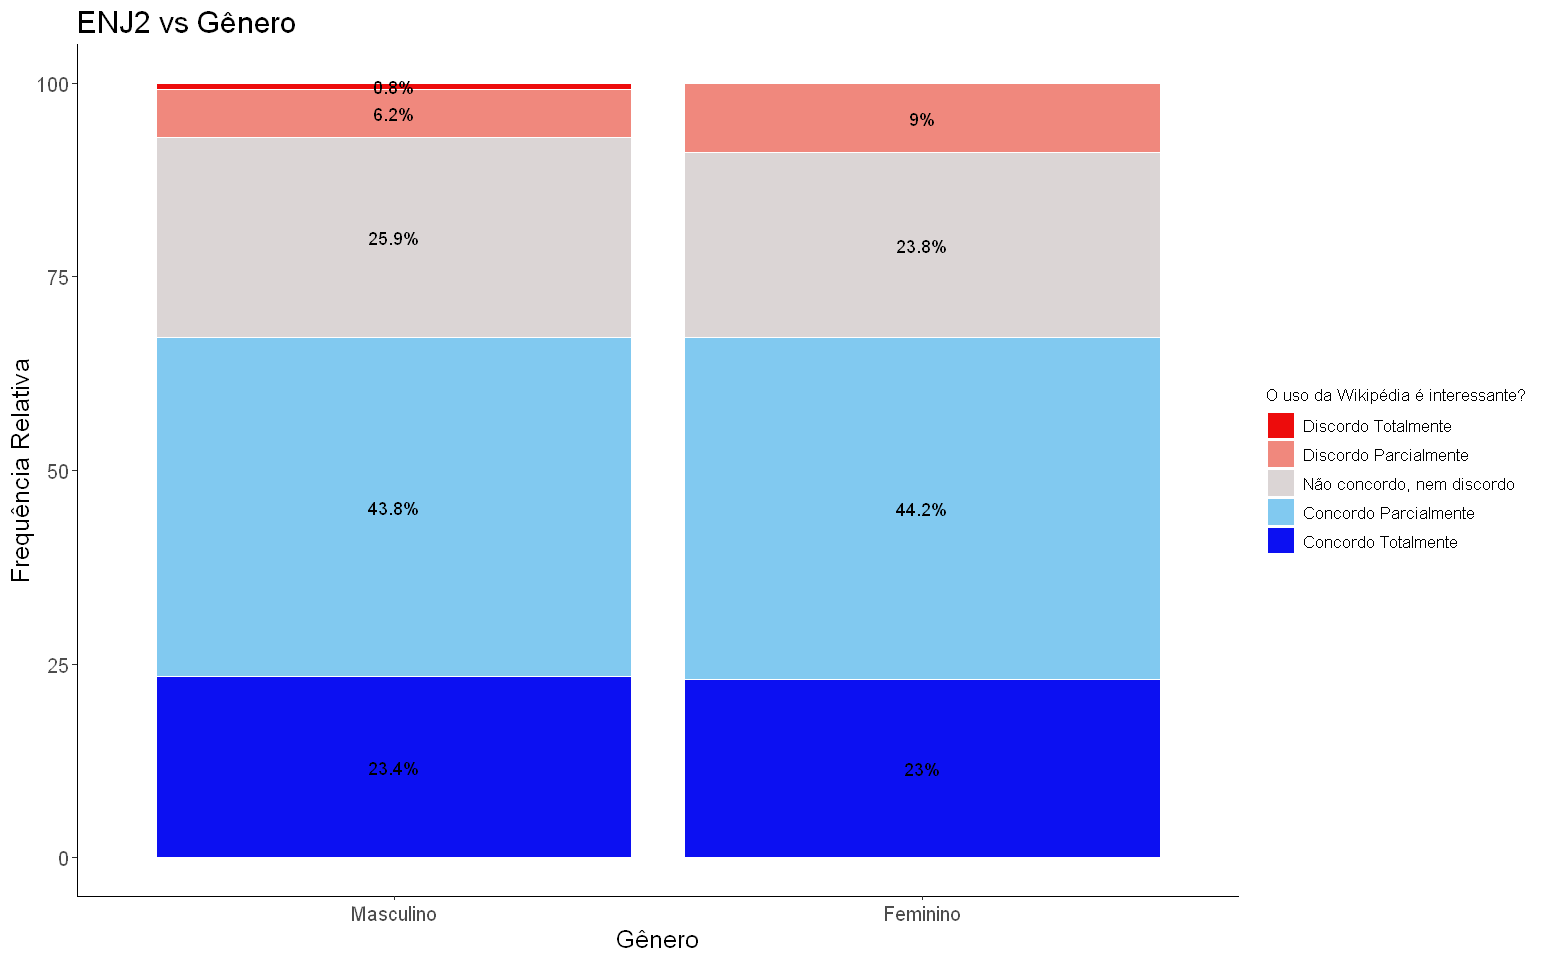

In [166]:
### ENJ2 vs Gênero ==========
ENJ2_gender <- dados %>% 
  drop_na(ENJ2) %>% # drop 7 observations
  group_by(GENDER, ENJ2) %>%
  summarise(n = n()) %>%
  mutate( freq = (n / sum(n))*100  )  # table of frequency and relative frequency to ENJ1

options(repr.plot.width=13, repr.plot.height=8)
ggplot( ENJ2_gender, aes(x = GENDER, y = freq, fill = ENJ2, label = paste0(round(freq, 1),"%") ) ) +
  geom_bar(stat = "identity", color = "white" ) +
ggtitle("ENJ2 vs Gênero")+
    geom_text(position = position_stack(vjust = 0.5))+
  labs(fill = "O uso da Wikipédia é interessante?", y = "Frequência Relativa", x = "Gênero" ) + 
  scale_fill_manual(values = mycols) +
  theme_classic() +
  theme(legend.title = element_text(size = 10),
        legend.text = element_text(size = 10),
        text = element_text(size=15))

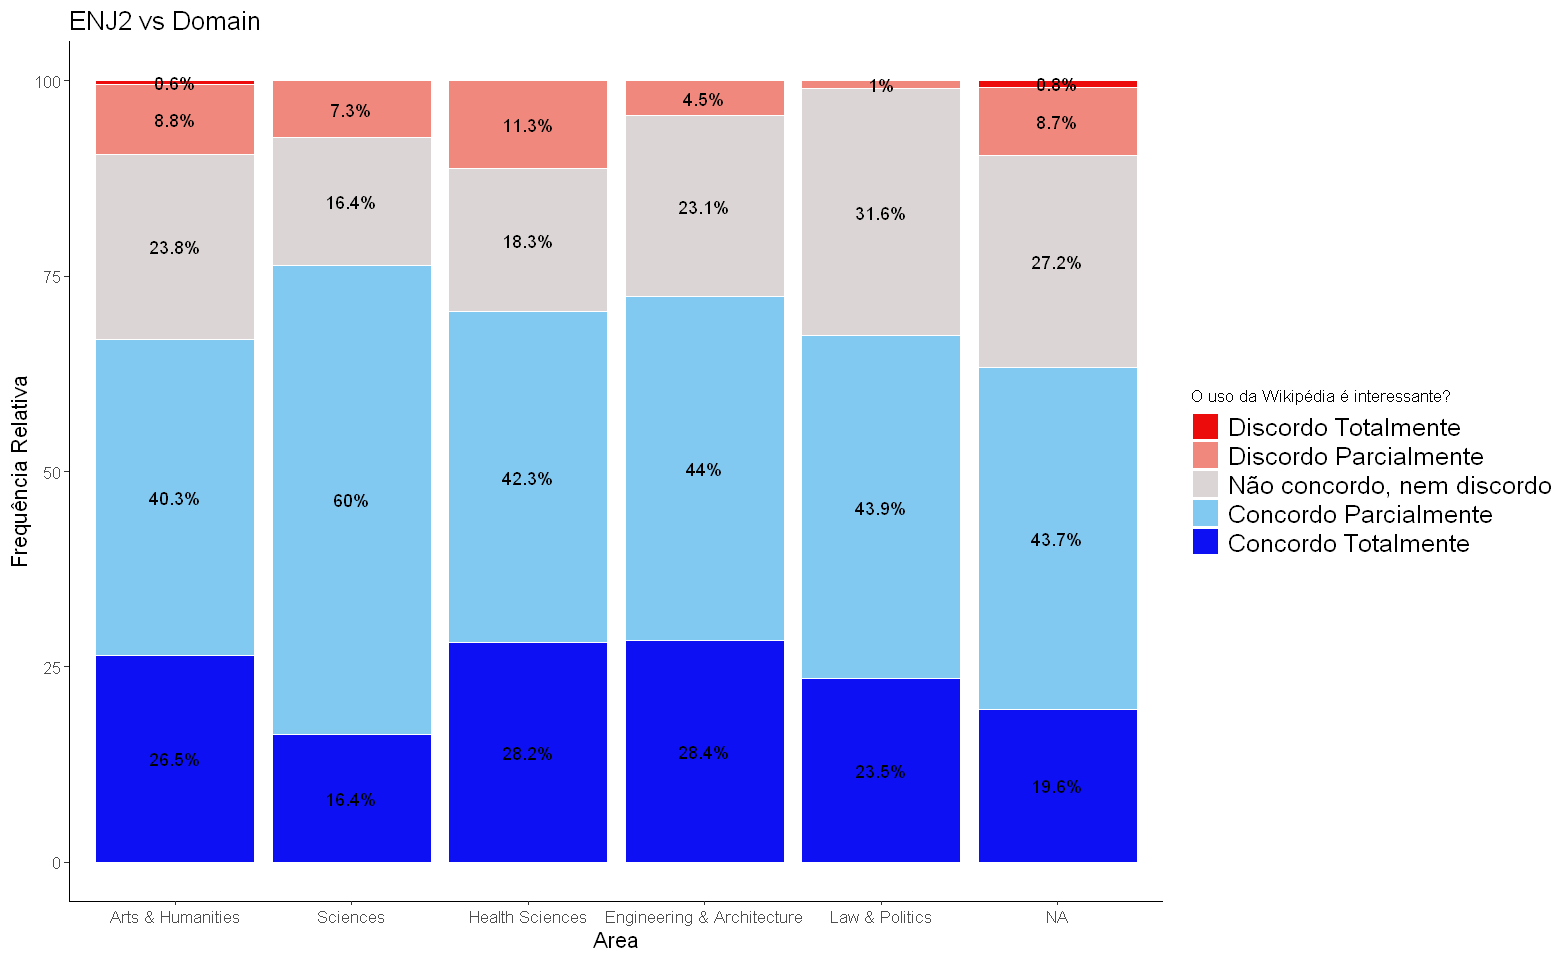

In [165]:
### ENJ2 vs Area ==========

ENJ2_domain <- dados %>% 
  drop_na(ENJ2) %>% # drop 7 observations
  group_by(DOMAIN, ENJ2) %>%
  summarise(n = n()) %>%
  mutate( freq = (n / sum(n))*100  )  # table of frequency and relative frequency to ENJ1

options(repr.plot.width=13, repr.plot.height=8)
ggplot( ENJ2_domain, aes(x = DOMAIN, y = freq, fill = ENJ2, label = paste0(round(freq, 1),"%") ) ) +
  geom_bar(stat = "identity", color = "white" ) +
ggtitle("ENJ2 vs Domain")+
    geom_text(position = position_stack(vjust = 0.5))+
  labs(fill = "O uso da Wikipédia é interessante?", y = "Frequência Relativa", x = "Area" ) + 
  scale_fill_manual(values = mycols) +
  theme_classic() +
  theme(legend.title = element_text(size = 10),
        legend.text = element_text(size = 15),
        text = element_text(size=13))

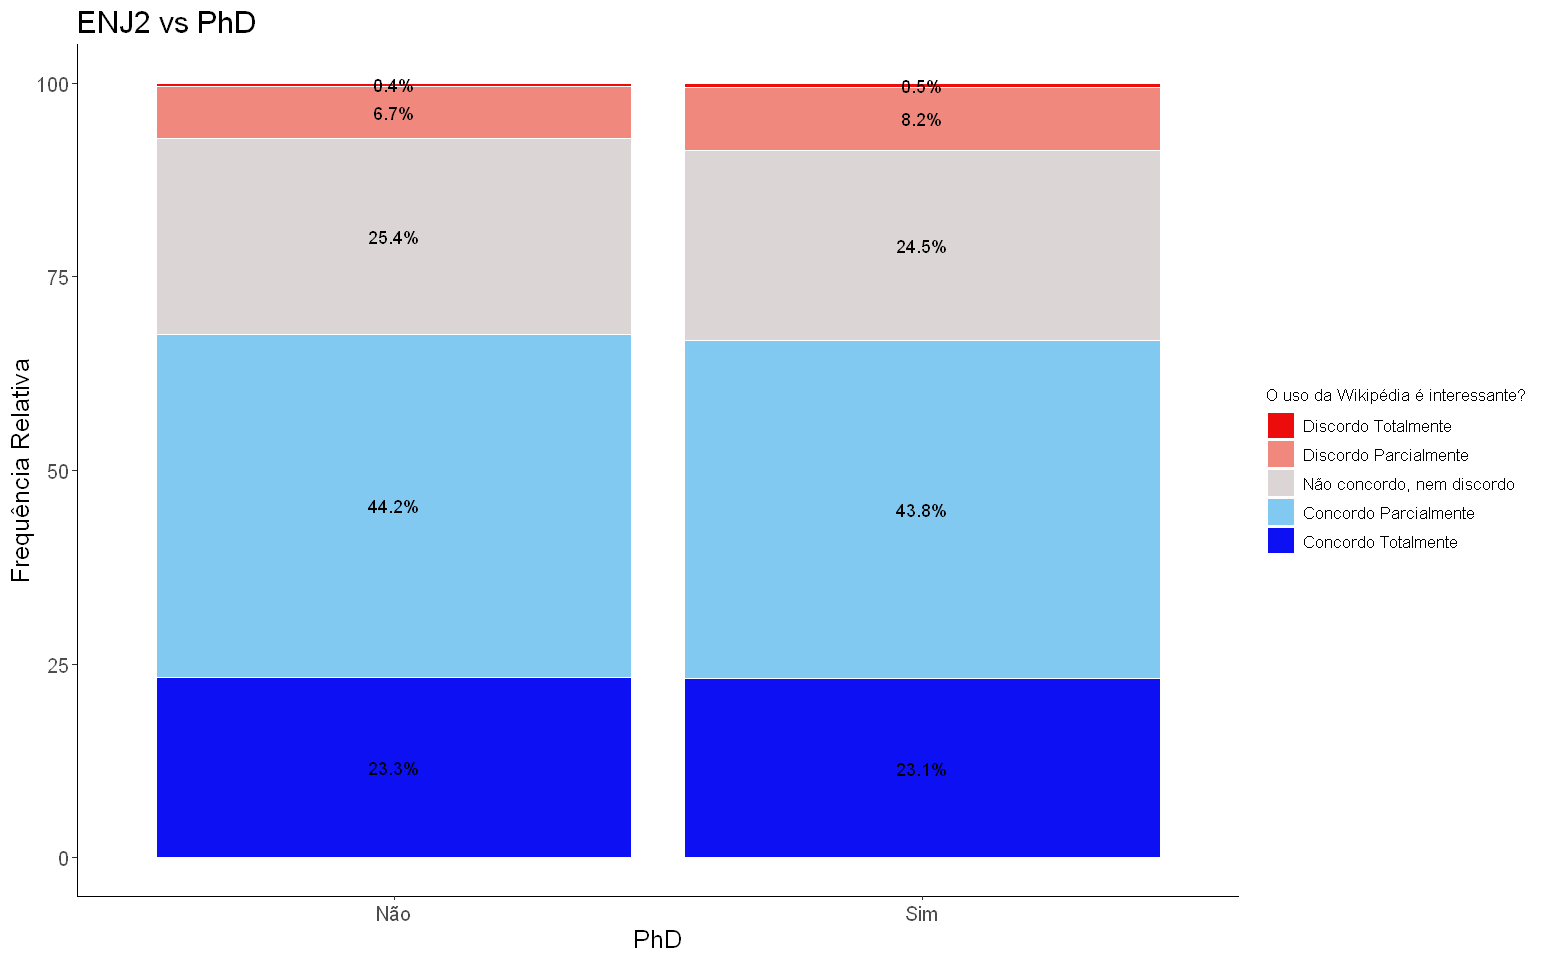

In [164]:
### ENJ2 vs Phd ==========

ENJ2_phd <- dados %>% 
  drop_na(ENJ2) %>% # drop 7 observations
  group_by(PhD, ENJ2) %>%
  summarise(n = n()) %>%
  mutate( freq = (n / sum(n))*100  )  # table of frequency and relative frequency to ENJ1

options(repr.plot.width=13, repr.plot.height=8)
ggplot( ENJ2_phd, aes(x = PhD, y = freq, fill = ENJ2, label = paste0(round(freq, 1),"%") ) ) +
  geom_bar(stat = "identity", color = "white" ) +
ggtitle("ENJ2 vs PhD")+
    geom_text(position = position_stack(vjust = 0.5))+
  labs(fill = "O uso da Wikipédia é interessante?", y = "Frequência Relativa", x = "PhD" ) + 
  scale_fill_manual(values = mycols) +
  theme_classic() +
  theme(legend.title = element_text(size = 10),
        legend.text = element_text(size = 10),
        text = element_text(size=15))

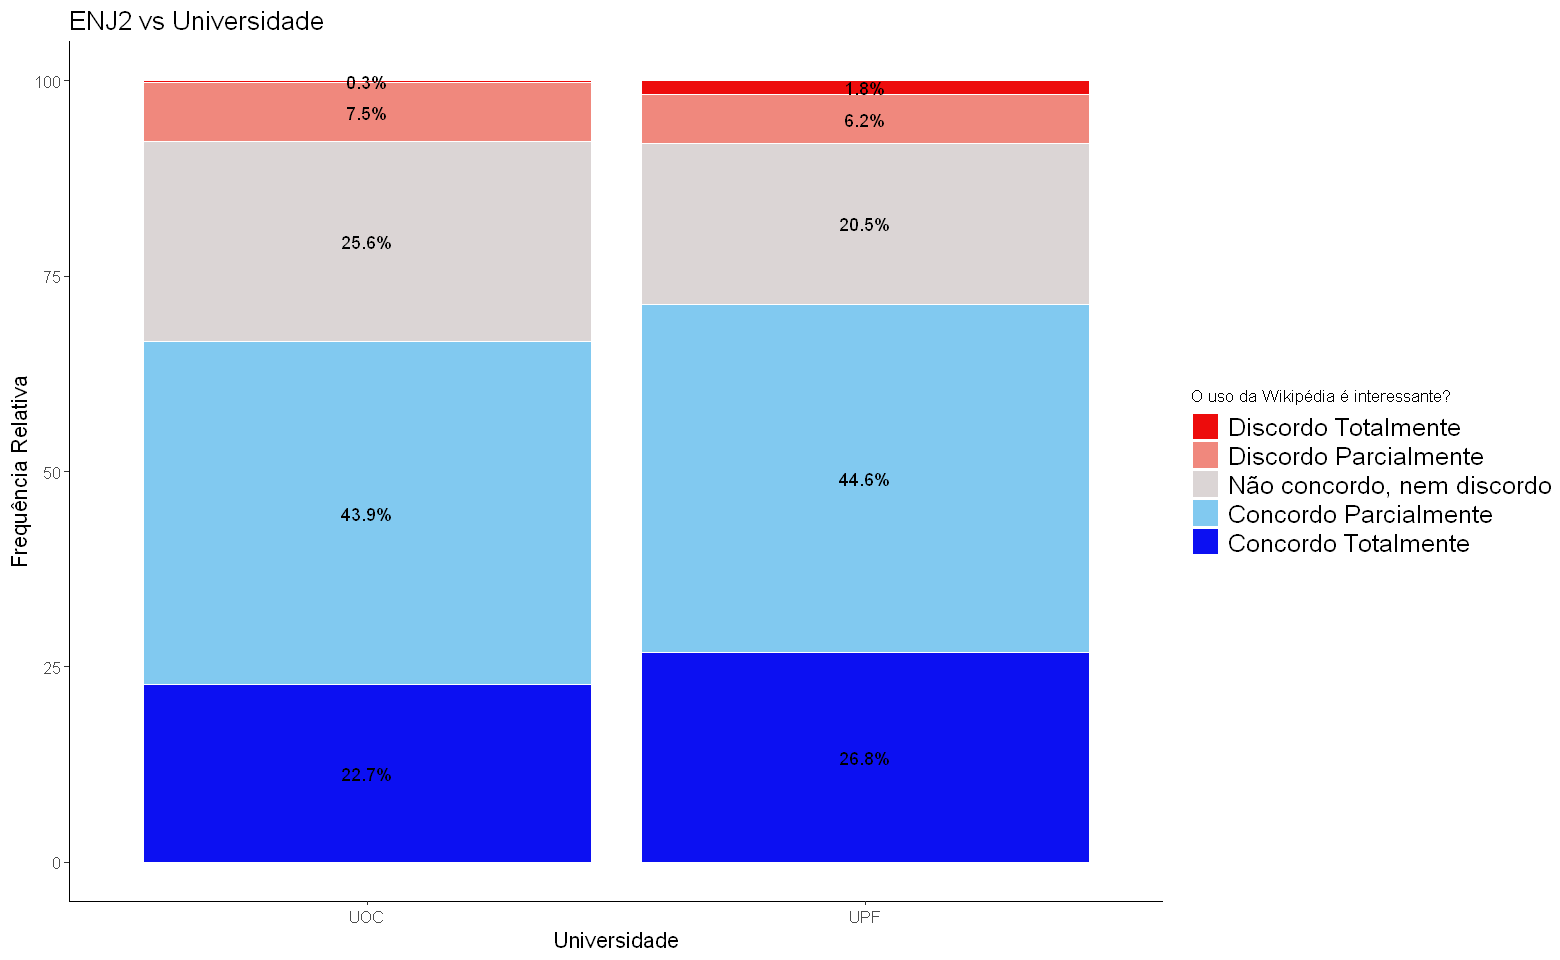

In [163]:
### ENJ2 vs Universidade ==========

ENJ2_uni <- dados %>% 
  drop_na(ENJ2) %>% # drop 7 observations
  group_by(UNIVERSITY, ENJ2) %>%
  summarise(n = n()) %>%
  mutate( freq = (n / sum(n))*100  )  # table of frequency and relative frequency to ENJ1

options(repr.plot.width=13, repr.plot.height=8)
ggplot( ENJ2_uni, aes(x = UNIVERSITY, y = freq, fill = ENJ2, label = paste0(round(freq, 1),"%") ) ) +
  geom_bar(stat = "identity", color = "white" ) +
    geom_text(position = position_stack(vjust = 0.5))+
ggtitle("ENJ2 vs Universidade")+
  labs(fill = "O uso da Wikipédia é interessante?", y = "Frequência Relativa", x = "Universidade" ) + 
  scale_fill_manual(values = mycols) +
  theme_classic() +
  theme(legend.title = element_text(size = 10),
        legend.text = element_text(size = 15),
        text = element_text(size=13))

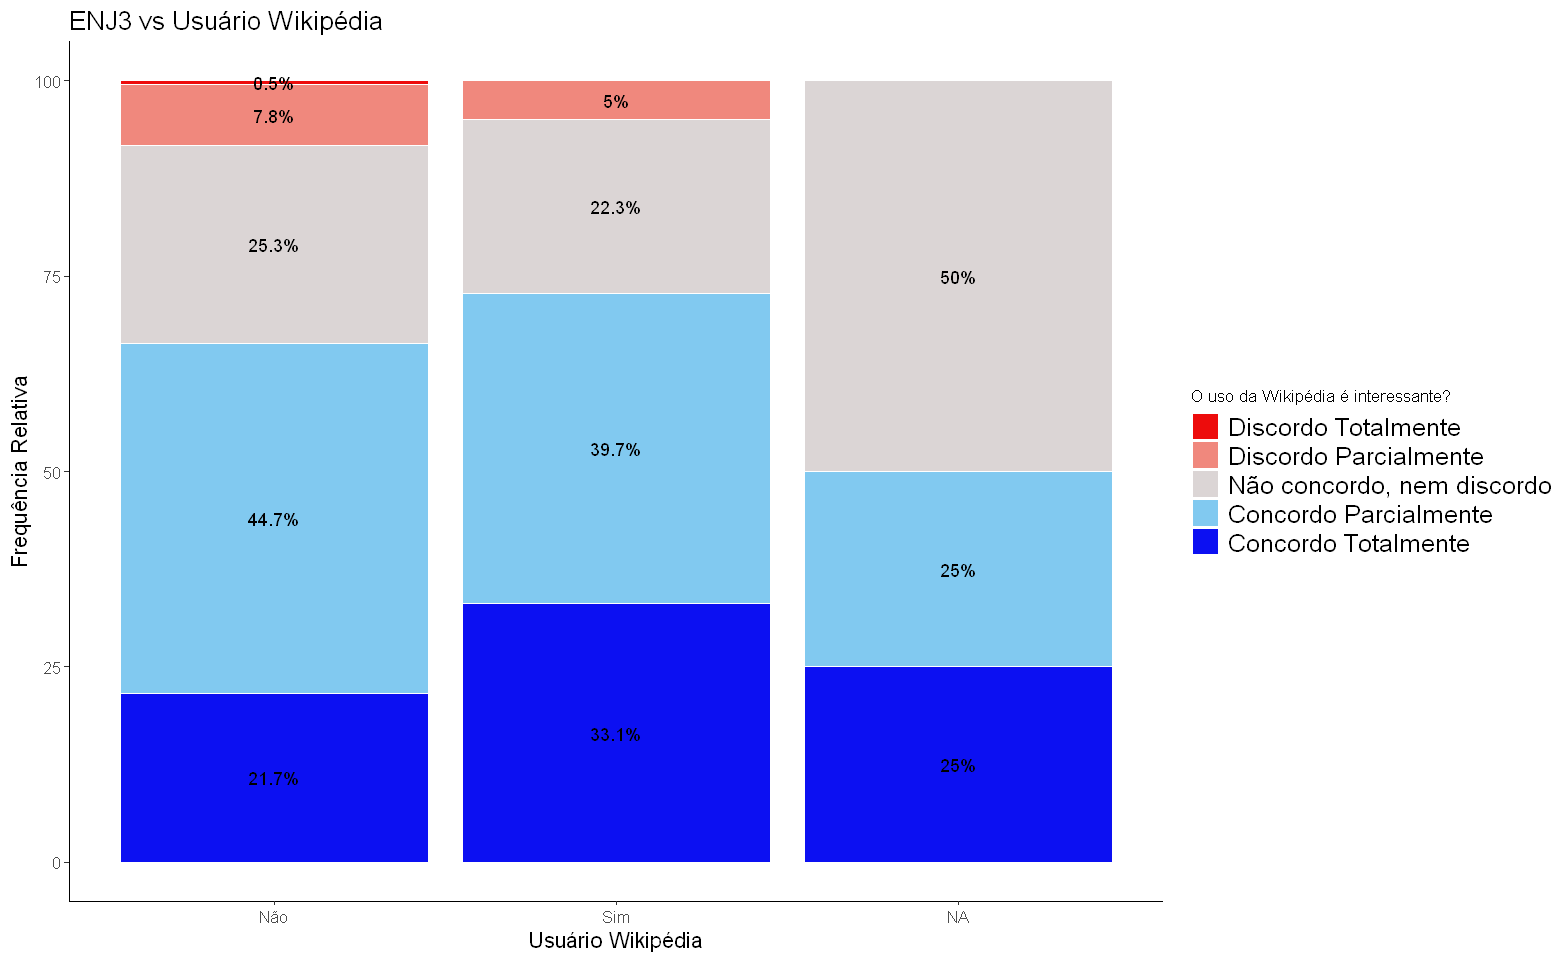

In [162]:
### ENJ2 vs Usuário Wikipédia ==========

ENJ2_user <- dados %>% 
  drop_na(ENJ2) %>% # drop 7 observations
  group_by(USERWIKI, ENJ2) %>%
  summarise(n = n()) %>%
  mutate( freq = (n / sum(n))*100  )  # table of frequency and relative frequency to ENJ1

options(repr.plot.width=13, repr.plot.height=8)
ggplot( ENJ2_user, aes(x = USERWIKI, y = freq, fill = ENJ2, label = paste0(round(freq, 1),"%") )) +
  geom_bar(stat = "identity", color = "white" ) +
ggtitle("ENJ3 vs Usuário Wikipédia")+
    geom_text(position = position_stack(vjust = 0.5))+
  labs(fill = "O uso da Wikipédia é interessante?", y = "Frequência Relativa", x = "Usuário Wikipédia" ) + 
  scale_fill_manual(values = mycols) +
  theme_classic() +
  theme(legend.title = element_text(size = 10),
        legend.text = element_text(size = 15),
        text = element_text(size=13))

Já para a variável ENJ2 (O uso da Wikipedia é divertido) comparada com sexo, area, PhD, universidade e se utiliza a wikipédia, os percentuais são muito parecidos entre as categórias, os resultados são bem parecidos com os anteriores. Apenas a variável que leva em consideração o fato do professor utilizar ou não a wikipédia que mostra uma leve diferença nas categórias, mostrando que indivíduos que usam a ferramenta tende a concordar com o fato que ela é divertida.

## Modelagem Estatística

### Recomendações (USE3)

Em nossa base de dados temos a variável **USE3** (recomendo que meus alunos usem a Wikipédia), está variável está na escala likert, ou seja, de 1 a 5. Vamos criar um indicador para transformar a variável em binária. Para isso, vamos definir que professores que marcaram para a questão os valores 4 ou 5 recomendariam o uso e os que marcaram 1,2 e 3 não recomendariam. Essa regra de decisão é arbitrária e poderia ser feita de outra forma se preferir. 


In [203]:
dados$recomenda = ifelse(dados$Use3=="5"|dados$Use3=="4", "1", "0"  ) # 1 = sim e 0 = não 
dados$recomenda = as.factor(dados$recomenda)
levels(dados$recomenda)=c( "Não","Sim")
table(dados$recomenda)



Não Sim 
658 246 

Agora que a variável de recomendação do professor a wikipédia é uma variável binária, podemos utilizar regressão logística. A regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, binária, a partir de uma série de variáveis explicativas. Como variável explicativa vamos utilizar as questões que já discutimos neste relatório, são elas: Idade, Gênero, Universidade, Anos de Experiência, Area, Se tem ou não PhD e se utiliza a wikipédia. 

Com a regressão logística podemos identificar quais variáveis são importantes para explicar o fato do dos professores recomendarem ou não o uso da wikipédia e com isso, conseguimos traçar os perfins dos professores que recomendam.

In [198]:
mod = glm( recomenda ~ AGE + GENDER + DOMAIN + PhD + YEARSEXP + UNIVERSITY + USERWIKI,
           data = dados, family = binomial( link = "logit" ) )
summary(mod)


Call:
glm(formula = recomenda ~ AGE + GENDER + DOMAIN + PhD + YEARSEXP + 
    UNIVERSITY + USERWIKI, family = binomial(link = "logit"), 
    data = dados)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8702  -0.8370  -0.5371   0.7738   2.5249  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      -0.345436   0.703492  -0.491 0.623405    
AGE                              -0.008976   0.016701  -0.537 0.590957    
GENDERFeminino                   -0.959834   0.253262  -3.790 0.000151 ***
DOMAINSciences                    0.317543   0.366804   0.866 0.386653    
DOMAINHealth Sciences            -0.655760   0.367540  -1.784 0.074393 .  
DOMAINEngineering & Architecture -0.264385   0.288523  -0.916 0.359490    
DOMAINLaw & Politics             -1.636542   0.401913  -4.072 4.66e-05 ***
PhDSim                           -0.160300   0.252218  -0.636 0.525061    
YEARSEXP                          0.0186

Após ajustar o modelo, temos um teste de hipótese para cada variável explicativa, esse teste nos informa quais variáveis são estatisticamente significativas para explicar a recomendação da wikipédia para os alunos. Concluimos que, apenas as variáveis Gênero, Domain, Universidade e o fato de usar ou não a wikipédia ajuda a explicar o fato do professor recomendar ou não o uso para os alunos.


